<table align="center">
  <td align="center"><a target="_blank" href="https://github.com/grboguz/Derin-Ogrenmeye-Giris">
        <img src="https://deeplearning.mit.edu/files/images/github/icon_github.png" style="padding-bottom:5px;"  />Kaynak Kodları Görüntüle</a></td>
  <td align="center"><a target="_blank" align="center" href="https://www.youtube.com/watch?v=O5xeyoRL95U&list=PLrAXtmErZgOeiKm4sgNOknGvNjby9efdf">
        <img src="https://deeplearning.mit.edu/files/images/github/icon_youtube.png" style="padding-bottom:5px;" />Oynatma Listesini Görüntüle</a></td>
  <td align="center"><a target="_blank" href="https://discord.gg/YW6mdcMnFF">
        <img src="https://i.ibb.co/m5fNddp/dc.png" style="padding-bottom:5px;"  />Discord Destek !</a></td>
<!--   <td><a target="_blank" href="link">
        <img src="image" />text</a></td> -->
</table>


# **MNIST**
MNIST, ABD Ulusal Standartlar ve Teknoloji Enstitüsü tarafından yayınlanan ve farklı insanlar tarafından el yazısı ile yazılmış rakamların yer aldığı bir veri setidir. Derin öğrenmeye yeni başlayan insanların en çok kullandıkları veri setidir. Biz de bu çalışmada MNIST veri setini inceleyip, temel bir uygulama gerçekleştireceğiz.


![My Image](https://camo.githubusercontent.com/1dde4ae3e937cd259af9856d539dbc3ad4ab8aee4ea499f54871632b3da2df1b/68747470733a2f2f692e696d6775722e636f6d2f6a3446714275522e676966)



   Uygulamaya geçmeden önce MNIST veri setinin özelliklerinden bahsetmekte fayda var:

*   Toplam 70000 bin resimden oluşur.
*   Bu resimlerin 60000'i eğitim, 10000'i test için ayrılmıştır.
*   0'dan 9'a kadar toplam 10 kategoriden oluşmaktadır.
*   Tüm resimler siyah-beyaz ve 28x28 pikseldir.

Bu bilgileri özellikle madde madde yazmamın nedeni, sinir ağımızı oluştururken veri kümemizin bu özelliklerini kullanıyor olmamızdır.

**Dipçe:** Bu notebook oluşturulurken pek çok kaynaktan yararlanıldı. Bunlar:

*   https://keras.io/
*   https://sogrekci.com/
*   https://github.com/fchollet
*   https://en.wikipedia.org/wiki/MNIST_database
*   https://github.com/lexfridman/mit-deep-learning




# 1. MNIST Veri Setini Yükleme

Uygulamamıza başlarken öncelikle MNIST veri setini yüklememiz gerekiyor. Keras içerisinde zaten yüklü olduğu için keras ile birlikte veri setini de çağırabiliyoruz. 

In [1]:
from keras.datasets import mnist
(train_img, train_labels) = mnist.load_data()[0]
(test_img, test_labels) = mnist.load_data()[1]

11501568/11490434 [==============================] - 0s 0us/step


Şimdi veri setinin içeriğini biraz inceleyip yukarıda verdiğimiz bilgilerin doğrulunu kontrol edelim.

In [2]:
print("Shape of Train Images: ",train_img.shape)
print("Shape of Test Images: ",test_img.shape)

Shape of Train Images:  (60000, 28, 28)
Shape of Test Images:  (10000, 28, 28)


Veri kümemiz içerisindeki bazı resimleri farklı yöntemlerle inceleyelim.

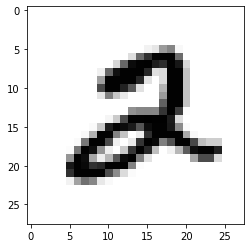

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_img[5], cmap='gray_r')
plt.show()


In [4]:
for row in train_img[5]:
    for i in row:
        print("%3s "%i, end='')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232  40   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 216  31  37 252 252  60   0   0   0 

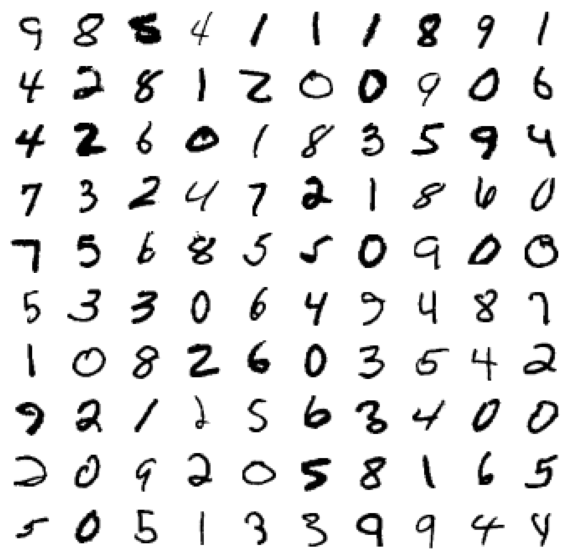

In [5]:
import numpy as np

n, k, figsize = 10, 10, (10, 10)
fig, ax = plt.subplots(n, k, figsize=figsize)
for i in range(n):
    for j in range(k):
        ax[i,j].imshow(train_img[np.random.randint(train_img.shape[0])], cmap='gray_r')
        ax[i,j].axis('off')

plt.show()

Eğitime başlamadan önce resimlerimizdeki tüm değerleri [0,1] aralığına sıkıştırıyoruz ve etiketlerinizi de kategorik olarak kodluyoruz.

In [6]:
train_img = train_img.reshape((60000,28*28))
train_img = train_img.astype("float32")/255

test_img = test_img.reshape((10000,28*28))
test_img = test_img.astype("float32")/255

In [7]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 2. Ağımızı Oluşturalım

Verilerimiz hazır hale geldiğine göre artık ağımızı inşa etmeye başlayabiliriz. Bu aşamada 2 katmanlı bir yapı oluşturacağız, dilerseniz katman sayısını artırabilir ve farklı aktivasyon foksiyonlarıyla modelinizin başarısını benimkiyle karşılaştırabilirsiniz. 

In [9]:
from keras import models
from keras import layers

In [10]:
model = models.Sequential()
model.add(layers.Dense(512,activation="relu", input_shape=(28*28,)))
model.add(layers.Dense(10,activation="softmax"))

In [11]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# 3. Modelimizi Eğitelim


Son olarak eğitim işlemimizi yapıp modelimizin *loss* ve *accuracy* değerlerini inceleyelim.

In [12]:
history = model.fit(train_img,
                    train_labels,
                    epochs=10,
                    batch_size=128)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2593 - accuracy: 0.9263
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1045 - accuracy: 0.9687
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0698 - accuracy: 0.9792
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0514 - accuracy: 0.9845
Epoch 5/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0383 - accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0282 - accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0220 - accuracy: 0.9938
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0176 - accuracy: 0.9949
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0133 - accuracy: 0.9962
Epoch 10/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0102 - accuracy:

In [13]:
history_dict = history.history
print("Keys: ",history_dict.keys())

Keys:  dict_keys(['loss', 'accuracy'])


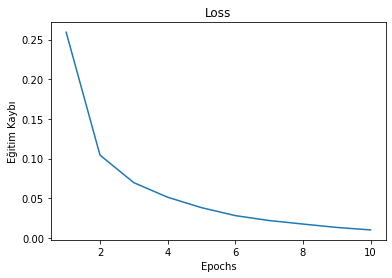

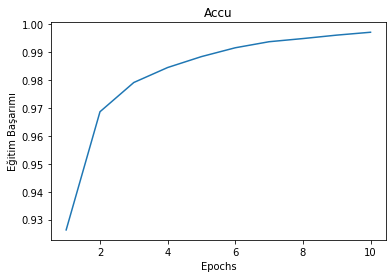

In [14]:
import matplotlib.pyplot as plt

epochs = range(1,11)
loss = history_dict['loss']
accuracy = history_dict['accuracy']

plt.plot(epochs,loss)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Eğitim Kaybı")
plt.show()

plt.plot(epochs,accuracy)
plt.title("Accu")
plt.xlabel("Epochs")
plt.ylabel("Eğitim Başarımı")
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(test_img,test_labels)
print("Test Loss: ",test_loss)
print("Test Accuracy: ",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0661 - accuracy: 0.9829
Test Loss:  0.06611394882202148
Test Accuracy:  0.9829000234603882
